In [260]:
# Machine Learning 3
# Part 1 - Clustering using K Means
# Dataset selected: Dow Jones Index Data Set
# Dataset taken from: https://archive.ics.uci.edu/ml/datasets/Dow+Jones+Index#

import pandas # used to read data into tabular format
import numpy
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
import seaborn

# Importing data into pandas dataframe object from csv file saved in Dropbox
# I made file at this location public so may be able to run as is 
# else please import data to Google Drive or Dropbox and try importing
dataFilePath = ("https://www.dropbox.com/s/j3fr7ubljk42x1d/dow_jones_index.txt?dl=1")
dowData = pandas.read_table(dataFilePath, header=0, index_col=False, skipinitialspace=True, sep=',',
                       names=['quarter', 'stock', 'date', 'open', 'high', 'low', 'close,volume', 
                              'percent_change_price','percent_change_volume_over_last_wk', 'previous_weeks_volume', 
                              'next_weeks_open,next_weeks_close', 'percent_change_next_weeks_price',
                              'days_to_next_dividend', 'percent_return_next_dividend'])

df = pandas.DataFrame(dowData);
df = df.drop(columns=['quarter', 'stock', 'date', 'open', 'high', 'low', 'close,volume', 
                              'percent_change_price','previous_weeks_volume', 
                              'next_weeks_open,next_weeks_close'])

print(df.dtypes)
df.head(n=100) # Checking if import was successful



percent_change_volume_over_last_wk    float64
percent_change_next_weeks_price        object
days_to_next_dividend                  object
percent_return_next_dividend          float64
dtype: object


,percent_change_volume_over_last_wk,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,3.792670,$16.71,$15.97,-4.428490
1,-4.428490,$16.19,$15.79,-2.470660
2,-2.470660,$15.87,$16.13,1.638310
3,1.638310,$16.18,$17.14,5.933250
4,5.933250,$17.33,$17.37,0.230814
...,...,...,...,...
95,0.557621,$54.11,$55.19,1.995930
96,4.531000,$39.01,$39.29,0.717765
97,0.717765,$39.07,$39.74,1.714870
98,1.714870,$39.64,$38.85,-1.992940


In [261]:
df.describe()

,percent_change_volume_over_last_wk,percent_return_next_dividend
count,750.000000,750.000000
mean,0.050262,0.238468
std,2.517809,2.679538
min,-15.422900,-15.422900
25%,-1.288053,-1.222067
50%,0.000000,0.101193
75%,1.650888,1.845562
max,9.882230,9.882230


In [262]:
df.columns= ['%ChangeVolumeLstWeek', '%ChangePriceNxtWeek', 'DaysToDividend', '%ReturnNextDiv' ]

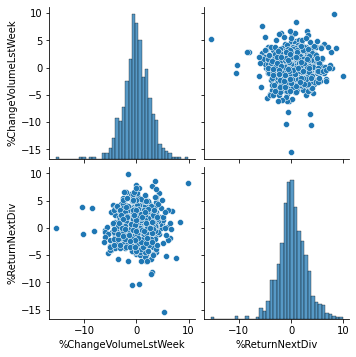

In [263]:
seaborn.pairplot(df[['%ChangeVolumeLstWeek', '%ChangePriceNxtWeek',
                     'DaysToDividend', '%ReturnNextDiv']])

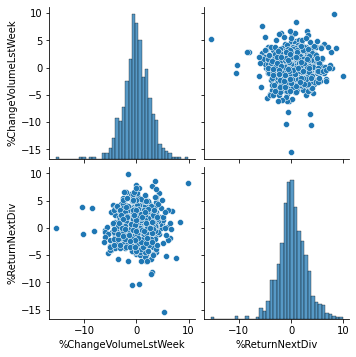

In [264]:
seaborn.pairplot(df[['%ChangeVolumeLstWeek', '%ChangePriceNxtWeek',
                     'DaysToDividend', '%ReturnNextDiv']])

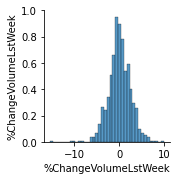

In [265]:
seaborn.pairplot(df[['%ChangeVolumeLstWeek', '%ChangePriceNxtWeek']])

In [266]:
dowData = pandas.read_table(dataFilePath, header=0, index_col=False, skipinitialspace=True, sep=',',
                       names=['quarter', 'stock', 'date', 'open', 'high', 'low', 'close', 'volume', 
                              'percent_change_price','percent_change_volume_over_last_wk', 'previous_weeks_volume', 
                              'next_weeks_open,next_weeks_close', 'percent_change_next_weeks_price',
                              'days_to_next_dividend', 'percent_return_next_dividend'])
df1 = pandas.DataFrame(dowData);
df1 = df1.drop(columns=['quarter', 'stock', 'date', 'open', 'high', 'low', 'close', 'percent_return_next_dividend', 'days_to_next_dividend'])
#Preprocessing - removing '$' from values 
df1[df1.columns[0:]] = df1[df1.columns[0:]].replace('[\$,]', '', regex=True).astype(float)
#Preprocessing - dropping missing values
df1 = df1.dropna() 
df1.head()

,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,"next_weeks_open,next_weeks_close",percent_change_next_weeks_price
1,242963398.0,-4.428490,1.380223,239655616.0,16.19,15.79
2,138428495.0,-2.470660,-43.024959,242963398.0,15.87,16.13
3,151379173.0,1.638310,9.355500,138428495.0,16.18,17.14
4,154387761.0,5.933250,1.987452,151379173.0,17.33,17.37
5,114691279.0,0.230814,-25.712195,154387761.0,17.39,17.28


In [267]:
#Confirming that data is all numeric (float64) data type
df1.dtypes

volume                                float64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open,next_weeks_close      float64
percent_change_next_weeks_price       float64
dtype: object

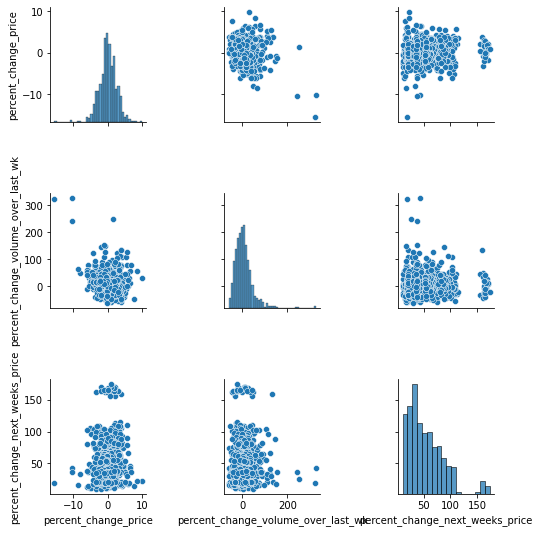

In [268]:
seaborn.pairplot(df1[['percent_change_price', 'percent_change_volume_over_last_wk', 'percent_change_next_weeks_price']])

In [269]:
X = df1[[ 'percent_change_price', 'percent_change_volume_over_last_wk','percent_change_next_weeks_price']]
#Experiment 1: K value = 5
KMCluster1 = KMeans(n_clusters = 5, init = "k-means++")
KMCluster1.fit(X)
print(KMCluster1.inertia_)

561819.047511336


In [270]:
#Confirming that cluster labels are between 0 and 4
KMCluster1.labels_

array([0, 3, 0, 0, 3, 3, 4, 3, 0, 0, 3, 3, 4, 0, 3, 0, 3, 0, 0, 0, 0, 3,
       3, 4, 1, 3, 1, 3, 4, 1, 1, 1, 1, 3, 0, 0, 3, 0, 3, 4, 0, 0, 0, 3,
       1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 3, 0, 0, 3, 2, 3, 3, 0, 0, 0, 3,
       1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 0, 3, 4, 3, 0, 3, 0, 0, 3, 0, 3,
       3, 0, 0, 0, 4, 3, 4, 3, 3, 4, 3, 3, 4, 0, 3, 0, 3, 4, 0, 0, 4, 3,
       3, 0, 0, 3, 3, 3, 4, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 2, 3, 3, 0, 3,
       1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 3,
       3, 0, 4, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 4, 3,
       3, 4, 0, 3, 4, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 4, 3, 0, 3,
       3, 1, 1, 1, 1, 3, 4, 4, 1, 1, 3, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 3, 0, 3, 3, 0, 4, 3, 3, 3, 3, 0, 4, 3, 0, 3, 0, 0, 3, 0, 3,
       3, 3, 4, 0, 3, 3, 0, 0, 3, 4, 3, 3, 0, 4, 3, 3, 3, 0, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 4, 0, 3, 3, 4, 0, 3, 4, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 0, 3,

In [271]:
# Experiment 2: K value = 10
KMCluster2 = KMeans(n_clusters = 10, random_state = 1, init = "k-means++")
KMCluster2.fit(X)
print(KMCluster2.inertia_)

242330.96191276508


In [272]:
# Experiment 3: K value = 25 
KMCluster3 = KMeans(n_clusters = 25, random_state = 1, init = "k-means++")
KMCluster3.fit(X)
print(KMCluster3.inertia_)

89072.48303453544


In [273]:
# Experiment 4: K value = 50 
KMCluster4 = KMeans(n_clusters = 50, random_state = 1, init = "k-means++")
KMCluster4.fit(X)
print(KMCluster4.inertia_)

37359.191814811114


In [274]:
# Experiment 5: K value = 100 
KMCluster5 = KMeans(n_clusters =100, random_state = 1, init = "k-means++")
KMCluster5.fit(X)
print(KMCluster5.inertia_)

16317.038255695825


Text(0.5, 1.0, 'Elbow curve')

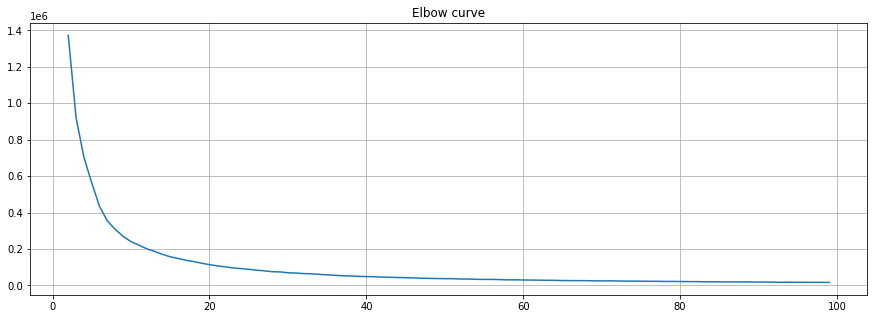

In [275]:

KMCluster = KMeans(n_clusters = 30, random_state = 1, init = "k-means++")
KMCluster.fit(X)
variations = []
for k in range(2, 100):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    variations.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 100), variations)
plt.grid(True)
plt.title('Elbow curve')


In [276]:
df1['clusters'] = KMCluster1.labels_
df1.clusters.describe()

count    720.000000
mean       1.575000
std        1.437599
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        4.000000
Name: clusters, dtype: float64

In [277]:
# Retrieving image3 (waterfall) directly from UTD site
!wget "https://personal.utdallas.edu/~axn112530/cs6375/unsupervised/images/image3.jpg"

--2021-08-04 04:36:36--  https://personal.utdallas.edu/~axn112530/cs6375/unsupervised/images/image3.jpg
Resolving personal.utdallas.edu (personal.utdallas.edu)... 129.110.46.112
Connecting to personal.utdallas.edu (personal.utdallas.edu)|129.110.46.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 612794 (598K) [image/jpeg]
Saving to: ‘image3.jpg’

image3.jpg          100%[===================>] 598.43K  2.91MB/s    in 0.2s    

2021-08-04 04:36:37 (2.91 MB/s) - ‘image3.jpg’ saved [612794/612794]



mkdir: cannot create directory ‘quantizedImages’: File exists


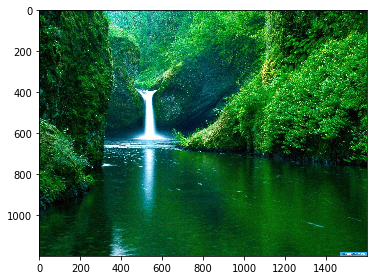

In [278]:
from skimage import io
from matplotlib import pyplot as plt
#Creating folder in google colab environment as specified in instructions
!mkdir quantizedImages 
image = io.imread('image3.jpg')
io.imshow(image)
io.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: image3_N3.png is a low contrast image
  app.launch_new_instance()


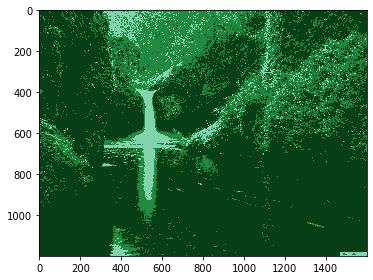

In [279]:
# Experiment 1.1 
image = io.imread('image3.jpg')
rows = image.shape[0]
cols = image.shape[1]

# Performing Compression  
image = image.reshape(image.shape[0]*image.shape[1],3)
# K value = 3
kmeans = KMeans(n_clusters = 3, n_init=10, max_iter=200)
kmeans.fit(image)
 
clusters = numpy.asarray(kmeans.cluster_centers_,dtype=numpy.uint8) 
labels = numpy.asarray(kmeans.labels_,dtype=numpy.uint8 )  
labels = labels.reshape(rows,cols); 
numpy.save('imag3_N3.npy',clusters)    
io.imsave('image3_N3.png',labels);

# Performing Decompression
centers = numpy.load('imag3_N3.npy')
c_image = io.imread('image3_N3.png')
 
image = numpy.zeros((c_image.shape[0],c_image.shape[1],3),dtype=numpy.uint8 )
for i in range(c_image.shape[0]):
    for j in range(c_image.shape[1]):
            image[i,j,:] = centers[c_image[i,j],:]

# Saving output image to quantizedImages folder 
#io.imsave('quantizedImages/New_image3_N3.jpg',image);
# Displaying new image inline
#image = io.imread('quantizedImages/New_image3_N3.jpg')
io.imshow(image)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: image3_N10.png is a low contrast image


FileNotFoundError: ignored

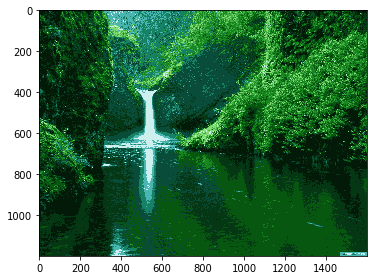

In [281]:
# Experiment 1.2
image = io.imread('image3.jpg')
rows = image.shape[0]
cols = image.shape[1]

# Performing Compression   
image = image.reshape(image.shape[0]*image.shape[1],3)
# K value = 10
kmeans = KMeans(n_clusters = 10, n_init=10, max_iter=200)
kmeans.fit(image)
 
clusters = numpy.asarray(kmeans.cluster_centers_,dtype=numpy.uint8) 
labels = numpy.asarray(kmeans.labels_,dtype=numpy.uint8 )  
labels = labels.reshape(rows,cols); 
 
numpy.save('image3_N10.npy',clusters)    
io.imsave('image3_N10.png',labels);

# Performing Decompression
centers = numpy.load('image3_N10.npy')
c_image = io.imread('image3_N10.png')
 
image = numpy.zeros((c_image.shape[0],c_image.shape[1],3),dtype=numpy.uint8 )
for i in range(c_image.shape[0]):
    for j in range(c_image.shape[1]):
            image[i,j,:] = centers[c_image[i,j],:]

# Saving output image to quantizedImages folder 
io.imsave('quantizedImages/New_image3_N10.jpg',image);
io.imshow(image)
# Displaying new image inline
io.imshow(image)

In [282]:
# Experiment 1.3
image = io.imread('image3.jpg')
rows = image.shape[0]
cols = image.shape[1]

# Performing Compression 
image = io.imread('image3.jpg')
rows = image.shape[0]
cols = image.shape[1]
image = image.reshape(image.shape[0]*image.shape[1],3)
# K value = 20
kmeans = KMeans(n_clusters = 20, n_init=10, max_iter=200)
kmeans.fit(image)
 
clusters = numpy.asarray(kmeans.cluster_centers_,dtype=numpy.uint8) 
labels = numpy.asarray(kmeans.labels_,dtype=numpy.uint8 )  
labels = labels.reshape(rows,cols); 
 
 
numpy.save('image3_N20.npy',clusters)    
io.imsave('image3_N20.png',labels);

centers = numpy.load('image3_N20.npy')
c_image = io.imread('image3_N20.png')
 
image = numpy.zeros((c_image.shape[0],c_image.shape[1],3),dtype=numpy.uint8 )
for i in range(c_image.shape[0]):
    for j in range(c_image.shape[1]):
            image[i,j,:] = centers[c_image[i,j],:]

# Saving output image to quantizedImages folder 
#io.imsave('quantizedImages/New_image3_K20.jpg',image);
io.imshow(image)
io.show()

KeyboardInterrupt: ignored

In [ ]:
# Retrieving image1 (Trees) directly from UTD site
!wget "https://personal.utdallas.edu/~axn112530/cs6375/unsupervised/images/image1.jpg"
image = io.imread('image1.jpg')
io.imshow(image)
# Displaying original image1 inline
io.show()

In [ ]:
# Experiment 2.1 
image = io.imread('image1.jpg')
rows = image.shape[0]
cols = image.shape[1]

# Performing Compression  
image = image.reshape(image.shape[0]*image.shape[1],3)
# K value = 3
kmeans = KMeans(n_clusters = 3, n_init=10, max_iter=200)
kmeans.fit(image)
 
clusters = numpy.asarray(kmeans.cluster_centers_,dtype=numpy.uint8) 
labels = numpy.asarray(kmeans.labels_,dtype=numpy.uint8 )  
labels = labels.reshape(rows,cols); 
numpy.save('image1_N3.npy',clusters)    
io.imsave('image1_N3.png',labels);

# Performing Decompression
centers = numpy.load('image1_N3.npy')
c_image = io.imread('image1_N3.png')
 
image = numpy.zeros((c_image.shape[0],c_image.shape[1],3),dtype=numpy.uint8 )
for i in range(c_image.shape[0]):
    for j in range(c_image.shape[1]):
            image[i,j,:] = centers[c_image[i,j],:]

# Saving output image to quantizedImages folder 
io.imsave('quantizedImages/New_image1_K3.jpg',image);
io.imshow(image)
# Displaying new image inline
io.show()

In [ ]:
# Experiment 2.2 
image = io.imread('image1.jpg')
rows = image.shape[0]
cols = image.shape[1]

# Performing Compression  
image = image.reshape(image.shape[0]*image.shape[1],3)
# K value = 10
kmeans = KMeans(n_clusters = 10, n_init=10, max_iter=200)
kmeans.fit(image)
 
clusters = numpy.asarray(kmeans.cluster_centers_,dtype=numpy.uint8) 
labels = numpy.asarray(kmeans.labels_,dtype=numpy.uint8 )  
labels = labels.reshape(rows,cols); 
numpy.save('image1_N10.npy',clusters)    
io.imsave('image1_N10.png',labels);

# Performing Decompression
centers = numpy.load('image1_N10.npy')
c_image = io.imread('image1_N10.png')
 
image = numpy.zeros((c_image.shape[0],c_image.shape[1],3),dtype=numpy.uint8 )
for i in range(c_image.shape[0]):
    for j in range(c_image.shape[1]):
            image[i,j,:] = centers[c_image[i,j],:]

# Saving output image to quantizedImages folder 
#io.imsave('quantizedImages/New_image1_K10.jpg',image);
io.imshow(image)
# Displaying new image inline
io.show()

In [ ]:
# Experiment 2.3 
image = io.imread('image1.jpg')
rows = image.shape[0]
cols = image.shape[1]

# Performing Compression  
image = image.reshape(image.shape[0]*image.shape[1],3)
# K value = 20
kmeans = KMeans(n_clusters = 20, n_init=10, max_iter=200)
kmeans.fit(image)
 
clusters = numpy.asarray(kmeans.cluster_centers_,dtype=numpy.uint8) 
labels = numpy.asarray(kmeans.labels_,dtype=numpy.uint8 )  
labels = labels.reshape(rows,cols); 
numpy.save('image1_N20.npy',clusters)    
io.imsave('image1_N20.png',labels);

# Performing Decompression
centers = numpy.load('image1_N20.npy')
c_image = io.imread('image1_N20.png')
 
image = numpy.zeros((c_image.shape[0],c_image.shape[1],3),dtype=numpy.uint8 )
for i in range(c_image.shape[0]):
    for j in range(c_image.shape[1]):
            image[i,j,:] = centers[c_image[i,j],:]

# Saving output image to quantizedImages folder 
#io.imsave('quantizedImages/New_image1_K20.jpg',image);
io.imshow(image)
# Displaying new image inline
io.show()

--2021-08-04 04:42:12--  https://personal.utdallas.edu/~axn112530/cs6375/unsupervised/images/image5.jpg
Resolving personal.utdallas.edu (personal.utdallas.edu)... 129.110.46.112
Connecting to personal.utdallas.edu (personal.utdallas.edu)|129.110.46.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 286293 (280K) [image/jpeg]
Saving to: ‘image5.jpg’

image5.jpg          100%[===================>] 279.58K  1.09MB/s    in 0.2s    

2021-08-04 04:42:12 (1.09 MB/s) - ‘image5.jpg’ saved [286293/286293]



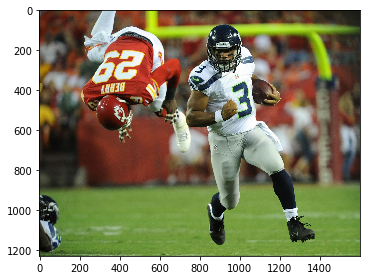

In [285]:
# Retrieving image5 (Football players) directly from UTD site
!wget "https://personal.utdallas.edu/~axn112530/cs6375/unsupervised/images/image5.jpg"
image = io.imread('image5.jpg')
io.imshow(image)
# Displaying unmodified image5 inline to validate install and provide reference for quantized images
io.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: image5_N3.png is a low contrast image
  app.launch_new_instance()


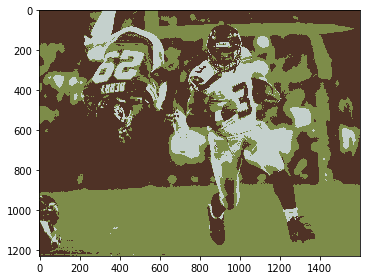

In [286]:
# Experiment 3.1 
image = io.imread('image5.jpg')
rows = image.shape[0]
cols = image.shape[1]

# Performing Compression  
image = image.reshape(image.shape[0]*image.shape[1],3)
# K value = 3
kmeans = KMeans(n_clusters = 3, n_init=10, max_iter=200)
kmeans.fit(image)
 
clusters = numpy.asarray(kmeans.cluster_centers_,dtype=numpy.uint8) 
labels = numpy.asarray(kmeans.labels_,dtype=numpy.uint8 )  
labels = labels.reshape(rows,cols); 
numpy.save('image5_N3.npy',clusters)    
io.imsave('image5_N3.png',labels);

# Performing Decompression
centers = numpy.load('image5_N3.npy')
c_image = io.imread('image5_N3.png')
 
image = numpy.zeros((c_image.shape[0],c_image.shape[1],3),dtype=numpy.uint8 )
for i in range(c_image.shape[0]):
    for j in range(c_image.shape[1]):
            image[i,j,:] = centers[c_image[i,j],:]

# Saving output image to quantizedImages folder 
#io.imsave('quantizedImages/New_image5_K3.jpg',image);
io.imshow(image)
# Displaying new image inline
io.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: image5_N10.png is a low contrast image
  app.launch_new_instance()


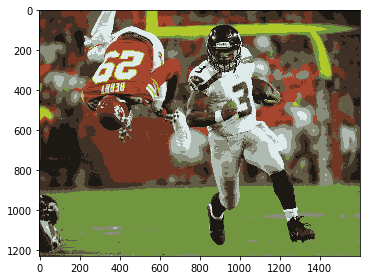

In [287]:
# Experiment 3.2 
image = io.imread('image5.jpg')
rows = image.shape[0]
cols = image.shape[1]

# Performing Compression  
image = image.reshape(image.shape[0]*image.shape[1],3)
# K value = 10
kmeans = KMeans(n_clusters = 10, n_init=10, max_iter=200)
kmeans.fit(image)
 
clusters = numpy.asarray(kmeans.cluster_centers_,dtype=numpy.uint8) 
labels = numpy.asarray(kmeans.labels_,dtype=numpy.uint8 )  
labels = labels.reshape(rows,cols); 
numpy.save('image5_N10.npy',clusters)    
io.imsave('image5_N10.png',labels);

# Performing Decompression
centers = numpy.load('image5_N10.npy')
c_image = io.imread('image5_N10.png')
 
image = numpy.zeros((c_image.shape[0],c_image.shape[1],3),dtype=numpy.uint8 )
for i in range(c_image.shape[0]):
    for j in range(c_image.shape[1]):
            image[i,j,:] = centers[c_image[i,j],:]

# Saving output image to quantizedImages folder 
#io.imsave('quantizedImages/New_image5_K10.jpg',image);
io.imshow(image)
# Displaying new image inline
io.show()

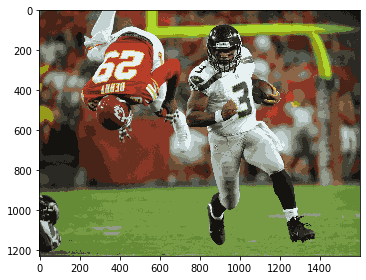

In [288]:
# Experiment 3.3 
image = io.imread('image5.jpg')
rows = image.shape[0]
cols = image.shape[1]

# Performing Compression  
image = image.reshape(image.shape[0]*image.shape[1],3)
# K value = 20
kmeans = KMeans(n_clusters = 20, n_init=10, max_iter=200)
kmeans.fit(image)
 
clusters = numpy.asarray(kmeans.cluster_centers_,dtype=numpy.uint8) 
labels = numpy.asarray(kmeans.labels_,dtype=numpy.uint8 )  
labels = labels.reshape(rows,cols); 
numpy.save('image5_N20.npy',clusters)    
io.imsave('image5_N20.png',labels);

# Performing Decompression
centers = numpy.load('image5_N20.npy')
c_image = io.imread('image5_N20.png')
 
image = numpy.zeros((c_image.shape[0],c_image.shape[1],3),dtype=numpy.uint8 )
for i in range(c_image.shape[0]):
    for j in range(c_image.shape[1]):
            image[i,j,:] = centers[c_image[i,j],:]

# Saving output image to quantizedImages folder 
io.imsave('quantizedImages/New_image5_K20.jpg',image);
io.imshow(image)
# Displaying new image inline
io.show()